<center>
# How to use dist and dist_of_wind_speed functions
</center>
***

In [1]:
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 25 June, 2019


***
## Outline:

This guide will demonstrate how to apply the distribtion_by_wind_speed and the distribution() functions to a sample dataset using the following steps:

- import the brightwind library and some sample data
- Using the distribution_by_wind_speed function to plot a frequency distribution from the sample data
- Using the distribution function to plot other variables such as temperature and bin appropriately
- Modifying the distribution function to plot two variables and bin appropriately
- Using a custom aggregation function for binning in the distribution function

***

In [2]:
import brightwind as bw

In [3]:
# specify location of existing sample dataset
filepath = r'C:\...\brightwind\datasets\demo\demo_data.csv'
# load data as dataframe
data = bw.load_csv(filepath) 
# show first few rows of dataframe
data.head(5)

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,8.370,7.911,8.160,7.849,7.857,7.626,1.240,1.075,1.060,0.947,...,6.100,110.1,6.009,112.2,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,8.250,7.961,8.100,7.884,7.952,7.840,0.897,0.875,0.900,0.855,...,5.114,110.9,4.702,109.8,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,7.652,7.545,7.671,7.551,7.531,7.457,0.756,0.703,0.797,0.749,...,4.172,113.1,3.447,111.8,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,7.382,7.325,6.818,6.689,6.252,6.174,0.844,0.810,0.897,0.875,...,4.680,118.8,5.107,115.6,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,7.977,7.791,8.110,7.915,8.140,7.974,0.556,0.528,0.562,0.524,...,3.123,115.9,2.960,113.6,3.540,0.863,100.0,934.0,0.0,12.69


### Distribution by Wind Speed

First we look at getting the frequency distribution of the windspeed column from our demo data. This will show how
frequently each windspeed occurs in the dataset that is passed into the function.

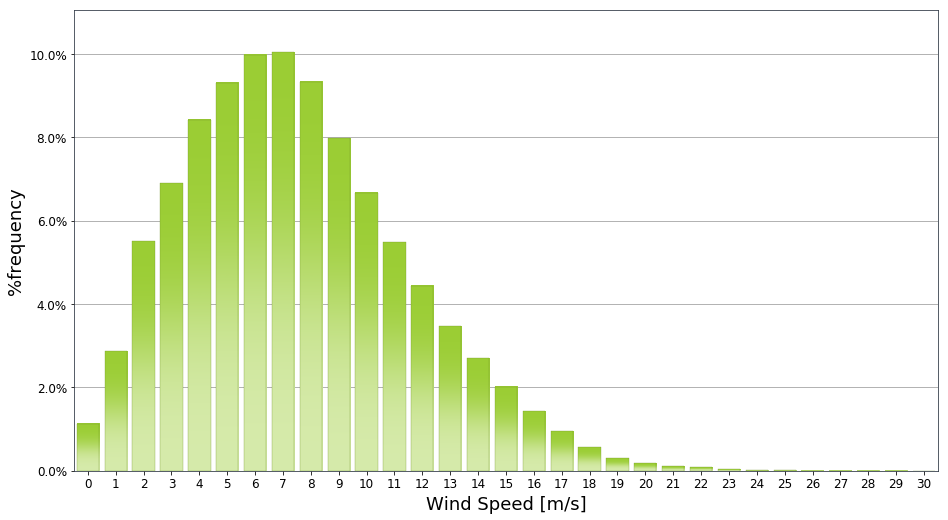

In [4]:
bw.dist_of_wind_speed(data.Spd80mN)

Equally we can use the freq_distribution function to return the same graph

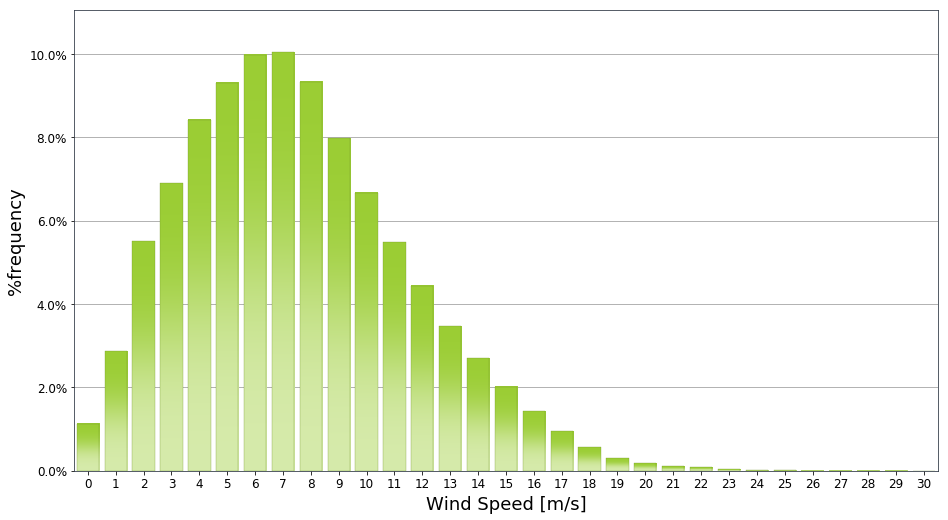

In [5]:
bw.freq_distribution(data.Spd80mN)

Next if we wish to return the data from the distribution graph we can assign a plot and a table to the function,
and activate the return_data variable.This returns the table of the distribtution by windspeed as the variable table.

In [6]:
freq_plot, freq_dist = bw.dist_of_wind_speed(data.Spd80mN, return_data=True)
freq_dist

variable_bin
[-0.5, 0.5)      1.133547
[0.5, 1.5)       2.874651
[1.5, 2.5)       5.507743
[2.5, 3.5)       6.906901
[3.5, 4.5)       8.427360
[4.5, 5.5)       9.308892
[5.5, 6.5)       9.984419
[6.5, 7.5)      10.050299
[7.5, 8.5)       9.336080
[8.5, 9.5)       7.980843
[9.5, 10.5)      6.675799
[10.5, 11.5)     5.479509
[11.5, 12.5)     4.442167
[12.5, 13.5)     3.466522
[13.5, 14.5)     2.700018
[14.5, 15.5)     2.021353
[15.5, 16.5)     1.428437
[16.5, 17.5)     0.945320
[17.5, 18.5)     0.560499
[18.5, 19.5)     0.303255
[19.5, 20.5)     0.180907
[20.5, 21.5)     0.110845
[21.5, 22.5)     0.084702
[22.5, 23.5)     0.044965
[23.5, 24.5)     0.020914
[24.5, 25.5)     0.012548
[25.5, 26.5)     0.005229
[26.5, 27.5)     0.004183
[27.5, 28.5)     0.001046
[28.5, 29.5)     0.001046
[29.5, 30.5)     0.000000
Name: %frequency, dtype: float64

### Distribution of anything!

The dist_of_wind_speed function is a distribution function specifically designed for windspeed and is a wrapper of the dist function. The dist function can be used to plot the distribution of any variable. Here we plot the frequency of occurence of different temperatures recorded by the temperature sensor. The function automatically finds the minimum and maximum of the data series and bins in units of 1.

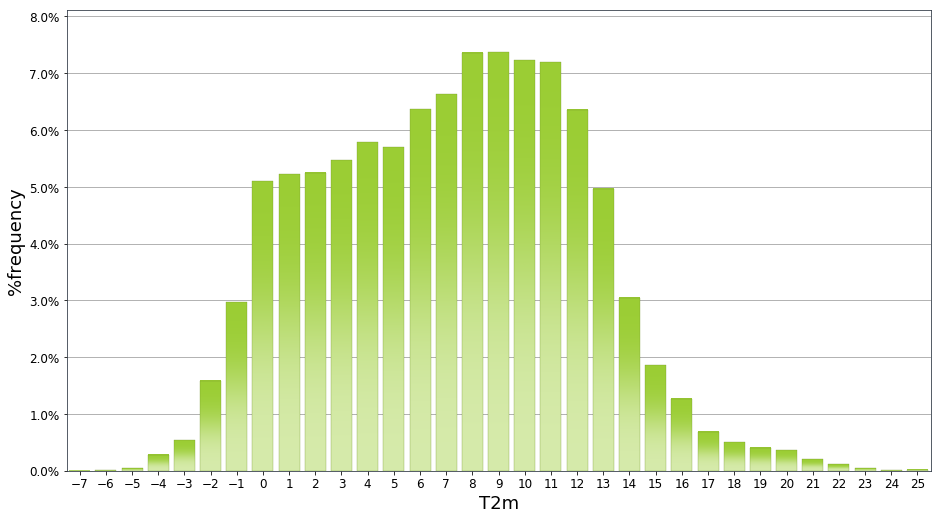

In [7]:
bw.dist(data.T2m)

If we only want to see the data binned for a certain range, we can specify the start and end of the bin values using the bins variable. Also T2m on the x-axis doesnt tell us anything meaningful about the data, so we can set the x_label variable to a useful name like Temperature.

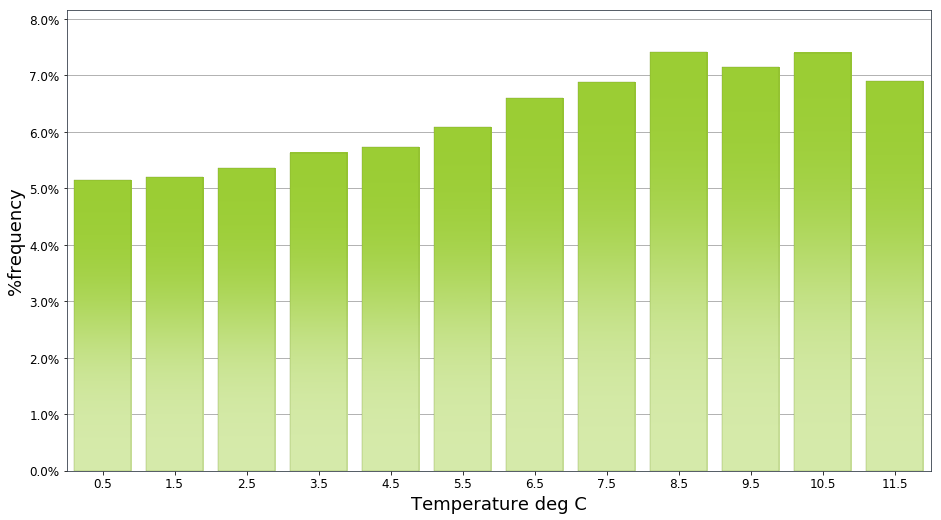

In [8]:
bw.dist(data.T2m,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12],x_label='Temperature deg C')

The dist function is flexible enough to plot two separate variables, binning by one variable, and plotting 
against the other. As an example, we have plotted the mean 80m windspeed against temperature. This will show the
mean wind speed for specific temperature ranges. The bins variable is used to specify the degrees Celcius to bin the data
by, while the bin_labels variable is used to specify the names to represent these bins. The aggregation_method is set
to mean to calculate the mean wind speed.

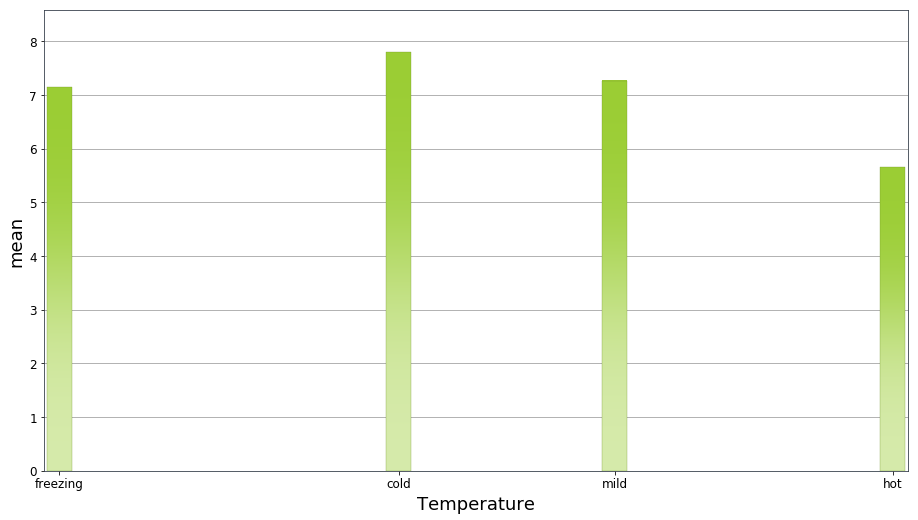

In [9]:
bw.dist(data.Spd80mN, var_to_bin_against=data.T2m,
    bins=[-10, 4, 12, 18, 30],
    bin_labels=['freezing', 'cold', 'mild', 'hot'], aggregation_method='mean',x_label='Temperature')

The dist) function also provides us with the flexibility to create a custom aggregation method. In the example
below we have created a custom aggregation function which finds the mean for each bin and adds two standard deviations.

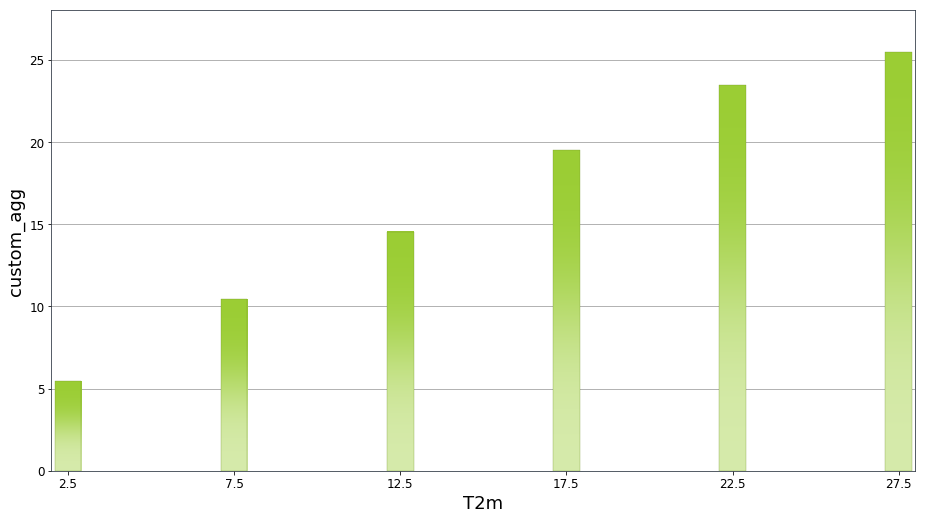

In [10]:
def custom_agg(x):
       return x.mean()+(2*x.std())
    
bw.dist(data.T2m, bins=[0, 5, 10, 15, 20, 25, 30], aggregation_method=custom_agg)

***
This tutorial can be downloaded as a Jupyter Notebook from the following link:
<br>
https://github.com/brightwind-dev/brightwind/tree/master/docs/source/tutorials/how_dist_function_works.ipynb

***